# TP1 du module 4 : le travail sur les données.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic. Objectifs :
* Analyser des statistiques pour décrire les données
* Produire des visualisations pertinentes pour la compréhesion des données.
* Nettoyer le jeu de données
* Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Commencez par recharger le jeu de données depuis un csv dans un dataframe Pandas. Rappel de l'adresse à laquelle vous pouvez le trouver : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

1. Combien de données dans le jeu de données Titanic ?

In [3]:
print(len(data))

891


2. Combien d'attributs compte le jeu de données ?

In [4]:
print(len(data.columns))

12


3. Identifiez quelles colonnes contiennent des données discrètes, et lesquelles contiennent des données continues.

In [5]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = [col for col in numerical_cols if data[col].nunique() > 20]
discrete_cols = [col for col in numerical_cols if data[col].nunique() <= 20]

print("\nColonnes avec données discrètes :")
print(discrete_cols)
print("\nColonnes avec données continues :")
print(continuous_cols)


Colonnes avec données discrètes :
['Survived', 'Pclass', 'SibSp', 'Parch']

Colonnes avec données continues :
['PassengerId', 'Age', 'Fare']


4. De la même manière, identifiez les colonnes de données qualitatives, et celles de données quantitatives.

In [6]:
qualitative_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].nunique() <= 10:
        qualitative_cols.append(col)

quantitative_cols = [col for col in data.columns if col not in qualitative_cols]

print("Colonnes avec données **qualitatives** :")
print(qualitative_cols)

print("\nColonnes avec données **quantitatives** :")
print(quantitative_cols)

Colonnes avec données **qualitatives** :
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

Colonnes avec données **quantitatives** :
['PassengerId', 'Age', 'Fare']


5. Affichez les statistiques de base sur les colonnes quantitatives du dataset. 
Quelles informations pouvez-vous en retirer ? Pour chaque attribut, cherchez au moins une information pertinente que vous pouvez déduire de vos observations.

6. Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants : Survived, Pclass, Sex, Embarked, Age, Fare. Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

In [7]:
quantitative_cols = ['Age', 'Fare', 'SibSp', 'Parch']

stats = data[quantitative_cols].describe()
print(stats)

              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


7. Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu. Que pouvez-vous en déduire ? Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si ce passager a survécu ?

C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_14276\967592432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', ax=axes[0, 0], palette='pastel')
C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_14276\967592432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Pclass', ax=axes[0, 1], palette='Set2')
C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_14276\967592432.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sex', ax=axes[0, 2], palette='Set3')
C:\Users\mr

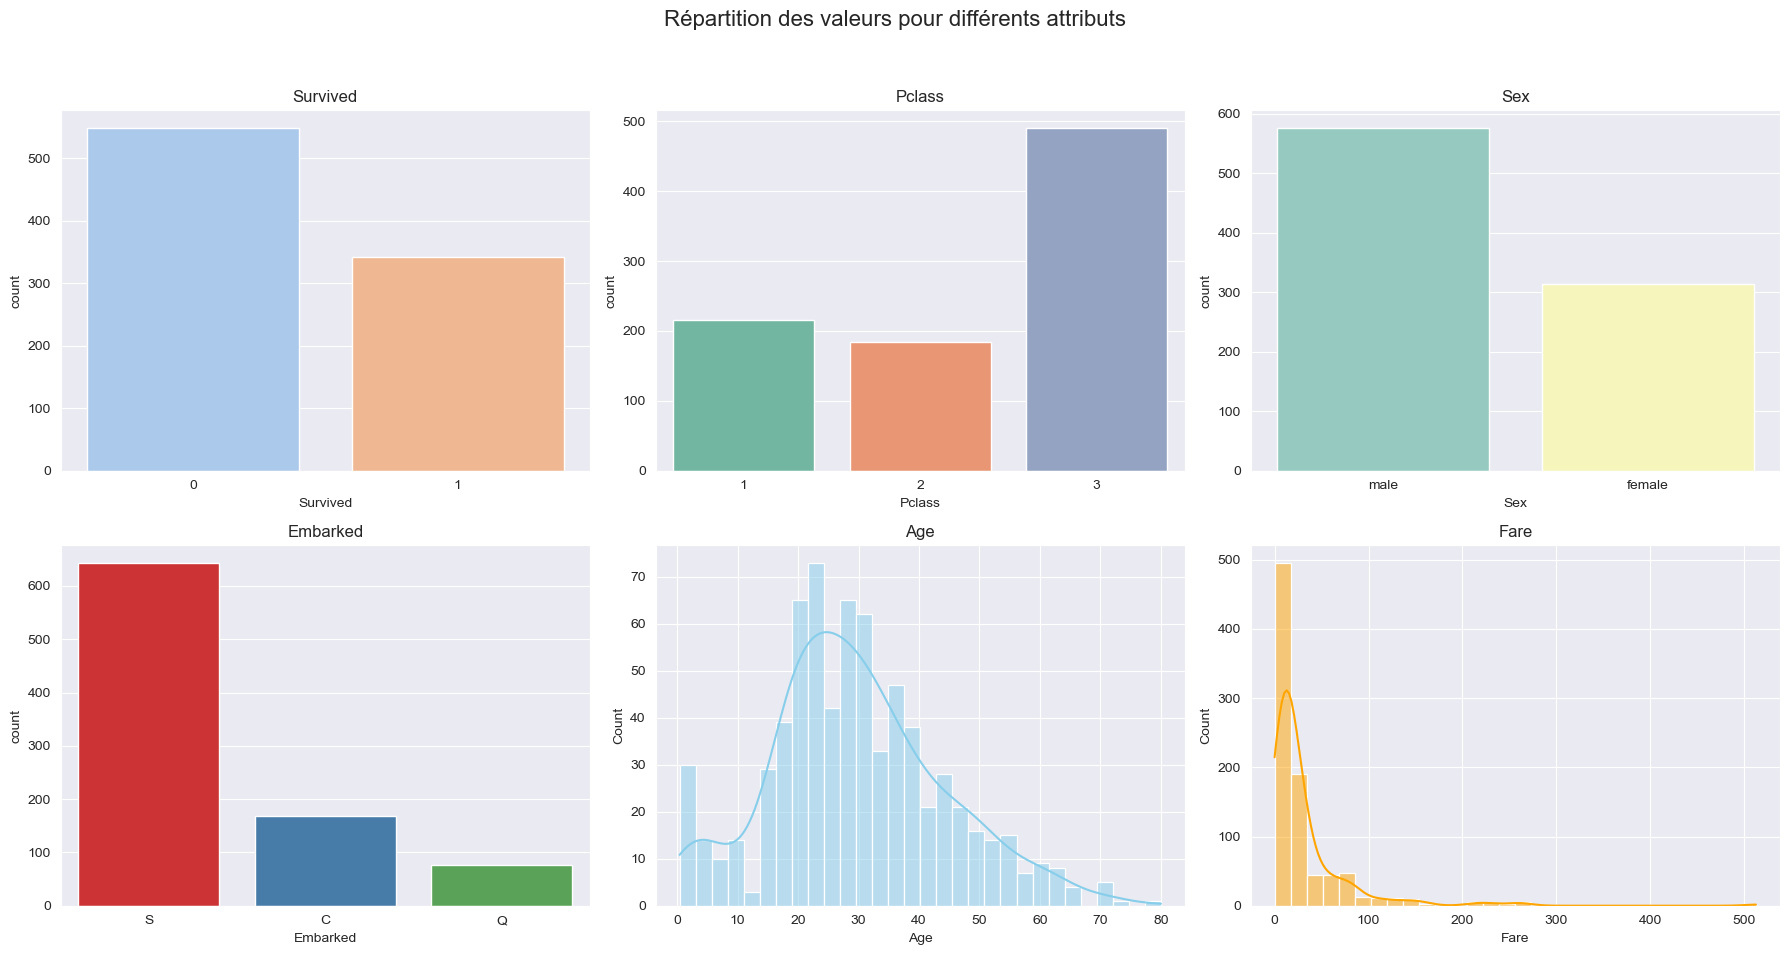

In [8]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Répartition des valeurs pour différents attributs", fontsize=16)

sns.countplot(data=data, x='Survived', ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title("Survived")

sns.countplot(data=data, x='Pclass', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title("Pclass")

sns.countplot(data=data, x='Sex', ax=axes[0, 2], palette='Set3')
axes[0, 2].set_title("Sex")

sns.countplot(data=data, x='Embarked', ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title("Embarked")

sns.histplot(data=data, x='Age', bins=30, ax=axes[1, 1], kde=True, color='skyblue')
axes[1, 1].set_title("Age")

sns.histplot(data=data, x='Fare', bins=30, ax=axes[1, 2], kde=True, color='orange')
axes[1, 2].set_title("Fare")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

8. En vous basant sur une visualisation, observez-vous une corrélation entre certains attributs ? Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

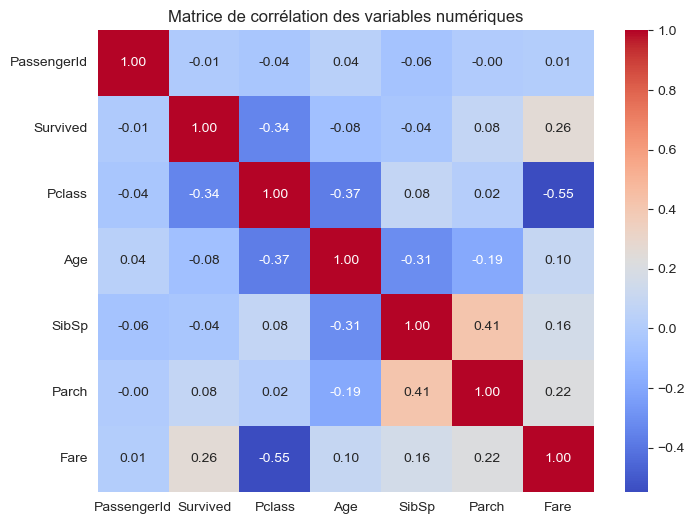

In [9]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

9. En vous basant sur vos observations de la visualisation précédente, confirmez vos impressions en proposant deux visualisations. Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B, mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B. 

C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_14276\2923526106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Pclass', y='Fare', palette='Set2')


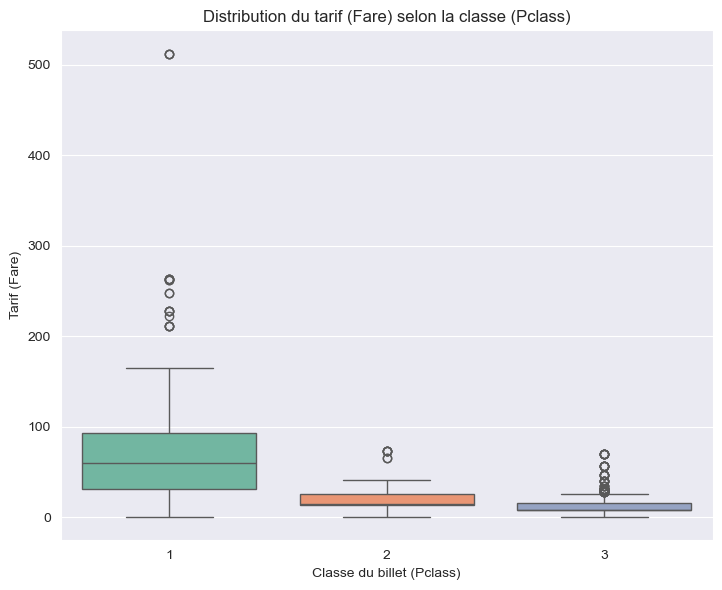

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Pclass', y='Fare', palette='Set2')
plt.title("Distribution du tarif (Fare) selon la classe (Pclass)")
plt.xlabel("Classe du billet (Pclass)")
plt.ylabel("Tarif (Fare)")
plt.tight_layout()

Text(0, 0.5, 'Tarif (Fare)')

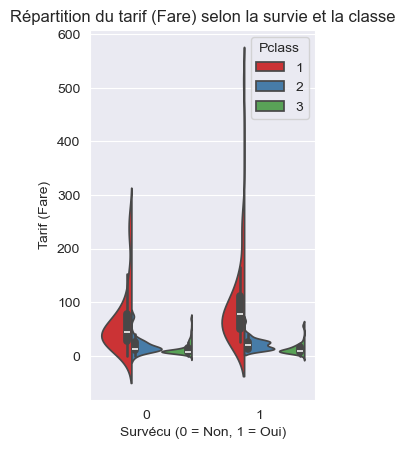

In [11]:
plt.subplot(1, 2, 2)
sns.violinplot(data=data, x='Survived', y='Fare', hue='Pclass', split=True, palette='Set1')
plt.title("Répartition du tarif (Fare) selon la survie et la classe")
plt.xlabel("Survécu (0 = Non, 1 = Oui)")
plt.ylabel("Tarif (Fare)")

10. Mettez-vous à présent dans le rôle d'un data analyst face à un nouveau jeu de données : quelles autres visualisations vous paraissent nécessaires ? Proposez au moins trois visualisations qui vous semblent pertinentes. Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

## Nettoyage des données
1. Pour chaque colonne, comptez le nombre de valeurs nulles.

In [12]:
null_counts = data.isnull().sum()
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Traitement du port d'embarquement

2. Les valeurs manquantes du port d'embarquement sont très peu nombreuses. De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire. Commencer par affichez les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

In [13]:
missing_embarked = data[data['Embarked'].isnull()]
print(missing_embarked)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


3. Remplacez ces valeurs nulles par la valeur 'U' (pour unknown). Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

In [14]:
data['Embarked'] = data['Embarked'].fillna('U')
missing_embarked_after = data[data['Embarked'] == 'U']
print(missing_embarked_after)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28        U  
829  female  62.0      0      0  113572  80.0   B28        U  


### Traitement du numéro de cabine

4. Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles. Cet attribut n'a pas de lien évident avec la survie des passagers. Supprimer cette colonne dans votre dataframe.

In [15]:
data = data.drop(columns=['Cabin'])
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


### Traitement de l'âge
5. L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées. Il existe plein de stratégies pour remplacer ces valeurs manquantes :
* Mettre une valeur aléatoire '(tirée entre le min et le max)
* Remplacer par la moyenne
* Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, etc)

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

In [16]:
age_means = data.groupby(['Sex', 'Pclass'])['Age'].mean()

print(age_means)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


6. Pour chaque ligne du jeu de données, si l'âge est manquant, remplacez la valeur nulle par une des valeurs calculées ci-dessus. basez-vous sur le genre et la classe du passager pour choisir la bonne valeur. 

In [17]:
age_means = data.groupby(['Sex', 'Pclass'])['Age'].mean()

def fill_age(row):
    if pd.isnull(row['Age']):
        return age_means.loc[row['Sex'], row['Pclass']]
    else:
        return row['Age']

data['Age'] = data.apply(fill_age, axis=1)

## Préparer les données

Nous entrons dans la dernière phase de traitement des données : nous allons terminer des les mettre en forme, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

# Encodage des données catégorielles

1. Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


2. Trois colonnes sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie. Supprimez ces trois colonnes de votre jeu de données.

In [19]:
colonnes_a_supprimer = ['PassengerId', 'Name', 'Ticket']
data = data.drop(columns=colonnes_a_supprimer)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


3. Reproduisez une manipulation vue au module 3 : combinez deux colonnes relatives aux familles de passagers pour n'en faire plus qu'une. Pensez à supprimer les deux anciennes colonnes.

In [20]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # +1 pour inclure le passager lui-même

data = data.drop(columns=['SibSp', 'Parch'])

4. Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ? En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées. Enfin, pensez à supprimer les anciennes colonnes.

Note : pour le genre, il n'y a que deux possibilités dans ce jeu de données. Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction).

In [23]:
colonnes_cat = ['Sex', 'Embarked']

X_cat = data[colonnes_cat]

encoder = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False, dtype=int)

X_encoded = encoder.fit_transform(X_cat)

noms_nouvelles_colonnes = encoder.get_feature_names_out(colonnes_cat)

df_encoded = pd.DataFrame(X_encoded, columns=noms_nouvelles_colonnes, index=data.index)

data = data.drop(columns=colonnes_cat)

data = pd.concat([data, df_encoded], axis=1)

data.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.0,7.2500,2,1,0,0,1,0
1,1,1,38.0,71.2833,2,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,0
3,1,1,35.0,53.1000,2,0,0,0,1,0
4,0,3,35.0,8.0500,1,1,0,0,1,0


5. Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle. Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite. Il est inutile de sauvegarder l'index présent dans le dataframe.

In [24]:
print(data.dtypes)
print(data.isnull().sum())
data.to_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index=False)

Survived        int64
Pclass          int64
Age           float64
Fare          float64
FamilySize      int64
Sex_male        int32
Embarked_C      int32
Embarked_Q      int32
Embarked_S      int32
Embarked_U      int32
dtype: object
Survived      0
Pclass        0
Age           0
Fare          0
FamilySize    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Embarked_U    0
dtype: int64


# Fin du TP !